# Imports


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Datasets

In [61]:
with open('./traffic-signs-data/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open('./traffic-signs-data/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open('./traffic-signs-data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [62]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [63]:
X_train.shape

(34799, 32, 32, 3)

In [64]:
y_train.shape

(34799,)

In [65]:
X_test.shape

(12630, 32, 32, 3)

In [66]:
y_test.shape

(12630,)

# Image Exploration

31

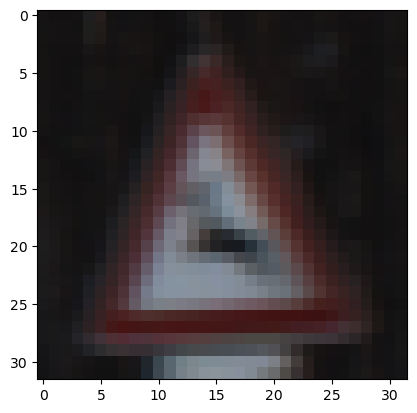

In [67]:
i = 388
plt.imshow(X_train[i])
y_train[i]

# Data Preparation

In [68]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [69]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [70]:
X_train_gray.shape

(34799, 32, 32, 1)

In [71]:
X_test_gray.shape

(12630, 32, 32, 1)

In [72]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [73]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [81]:
X_test_gray_norm.shape

(12630, 32, 32, 1)

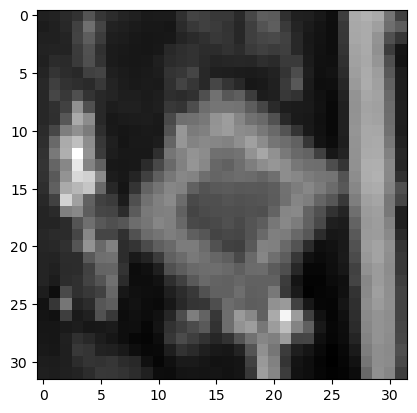

In [75]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')


# Training

In [76]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [77]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation= 'relu', input_shape = (32, 32, 1)))
cnn_model.add(AveragePooling2D())


cnn_model.add(Conv2D(filters = 16, kernel_size=(5,5), activation= 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation= 'relu'))

cnn_model.add(Dense(units = 84, activation= 'relu'))

cnn_model.add(Dense(units = 43, activation= 'softmax'))

In [78]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(learning_rate= 0.001), metrics= ['accuracy'])

In [83]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size=500,
             epochs = 50,
             verbose=1,
             validation_data= (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 4s 51ms/step - loss: 0.2566 - accuracy: 0.9343 - val_loss: 0.5896 - val_accuracy: 0.8308
Epoch 2/50
70/70 [==============================] - 3s 49ms/step - loss: 0.2334 - accuracy: 0.9397 - val_loss: 0.6075 - val_accuracy: 0.8231
Epoch 3/50
70/70 [==============================] - 2s 29ms/step - loss: 0.2121 - accuracy: 0.9455 - val_loss: 0.5602 - val_accuracy: 0.8429
Epoch 4/50
70/70 [==============================] - 3s 46ms/step - loss: 0.1925 - accuracy: 0.9510 - val_loss: 0.5498 - val_accuracy: 0.8456
Epoch 5/50
70/70 [==============================] - 4s 51ms/step - loss: 0.1789 - accuracy: 0.9541 - val_loss: 0.5422 - val_accuracy: 0.8549
Epoch 6/50
70/70 [==============================] - 3s 45ms/step - loss: 0.1585 - accuracy: 0.9607 - val_loss: 0.5688 - val_accuracy: 0.8501
Epoch 7/50
70/70 [==============================] - 4s 61ms/step - loss: 0.1476 - accuracy: 0.9624 - val_loss: 0.5563 - val_accuracy: 0.8585
Epoch 8/50
70

# Model Evaluation

In [87]:
 score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.4759 - accuracy: 0.8598
Test Accuracy: 0.8597782850265503


In [88]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [90]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

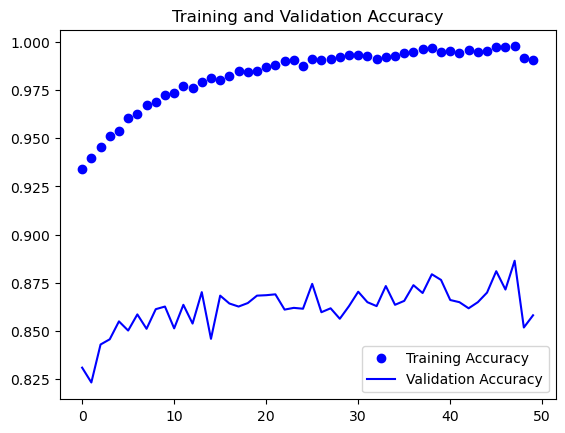

In [94]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')

plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.legend()

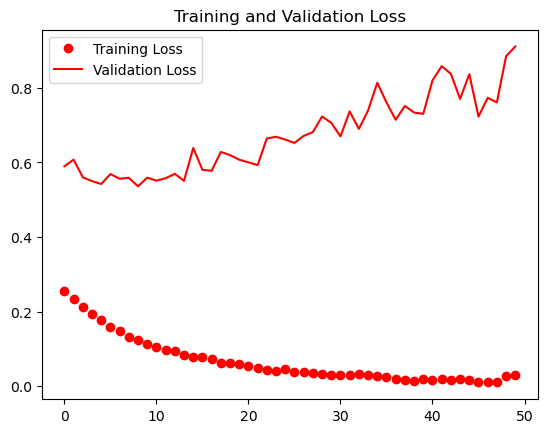

In [96]:
plt.plot(epochs, loss, 'ro', label='Training Loss')

plt.plot(epochs, val_loss, 'r', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.legend()

In [113]:
predicted_classes = cnn_model.predict(X_test_gray_norm)
y_true = y_test

395/395 [==============================] - 1s 2ms/step


<AxesSubplot:>

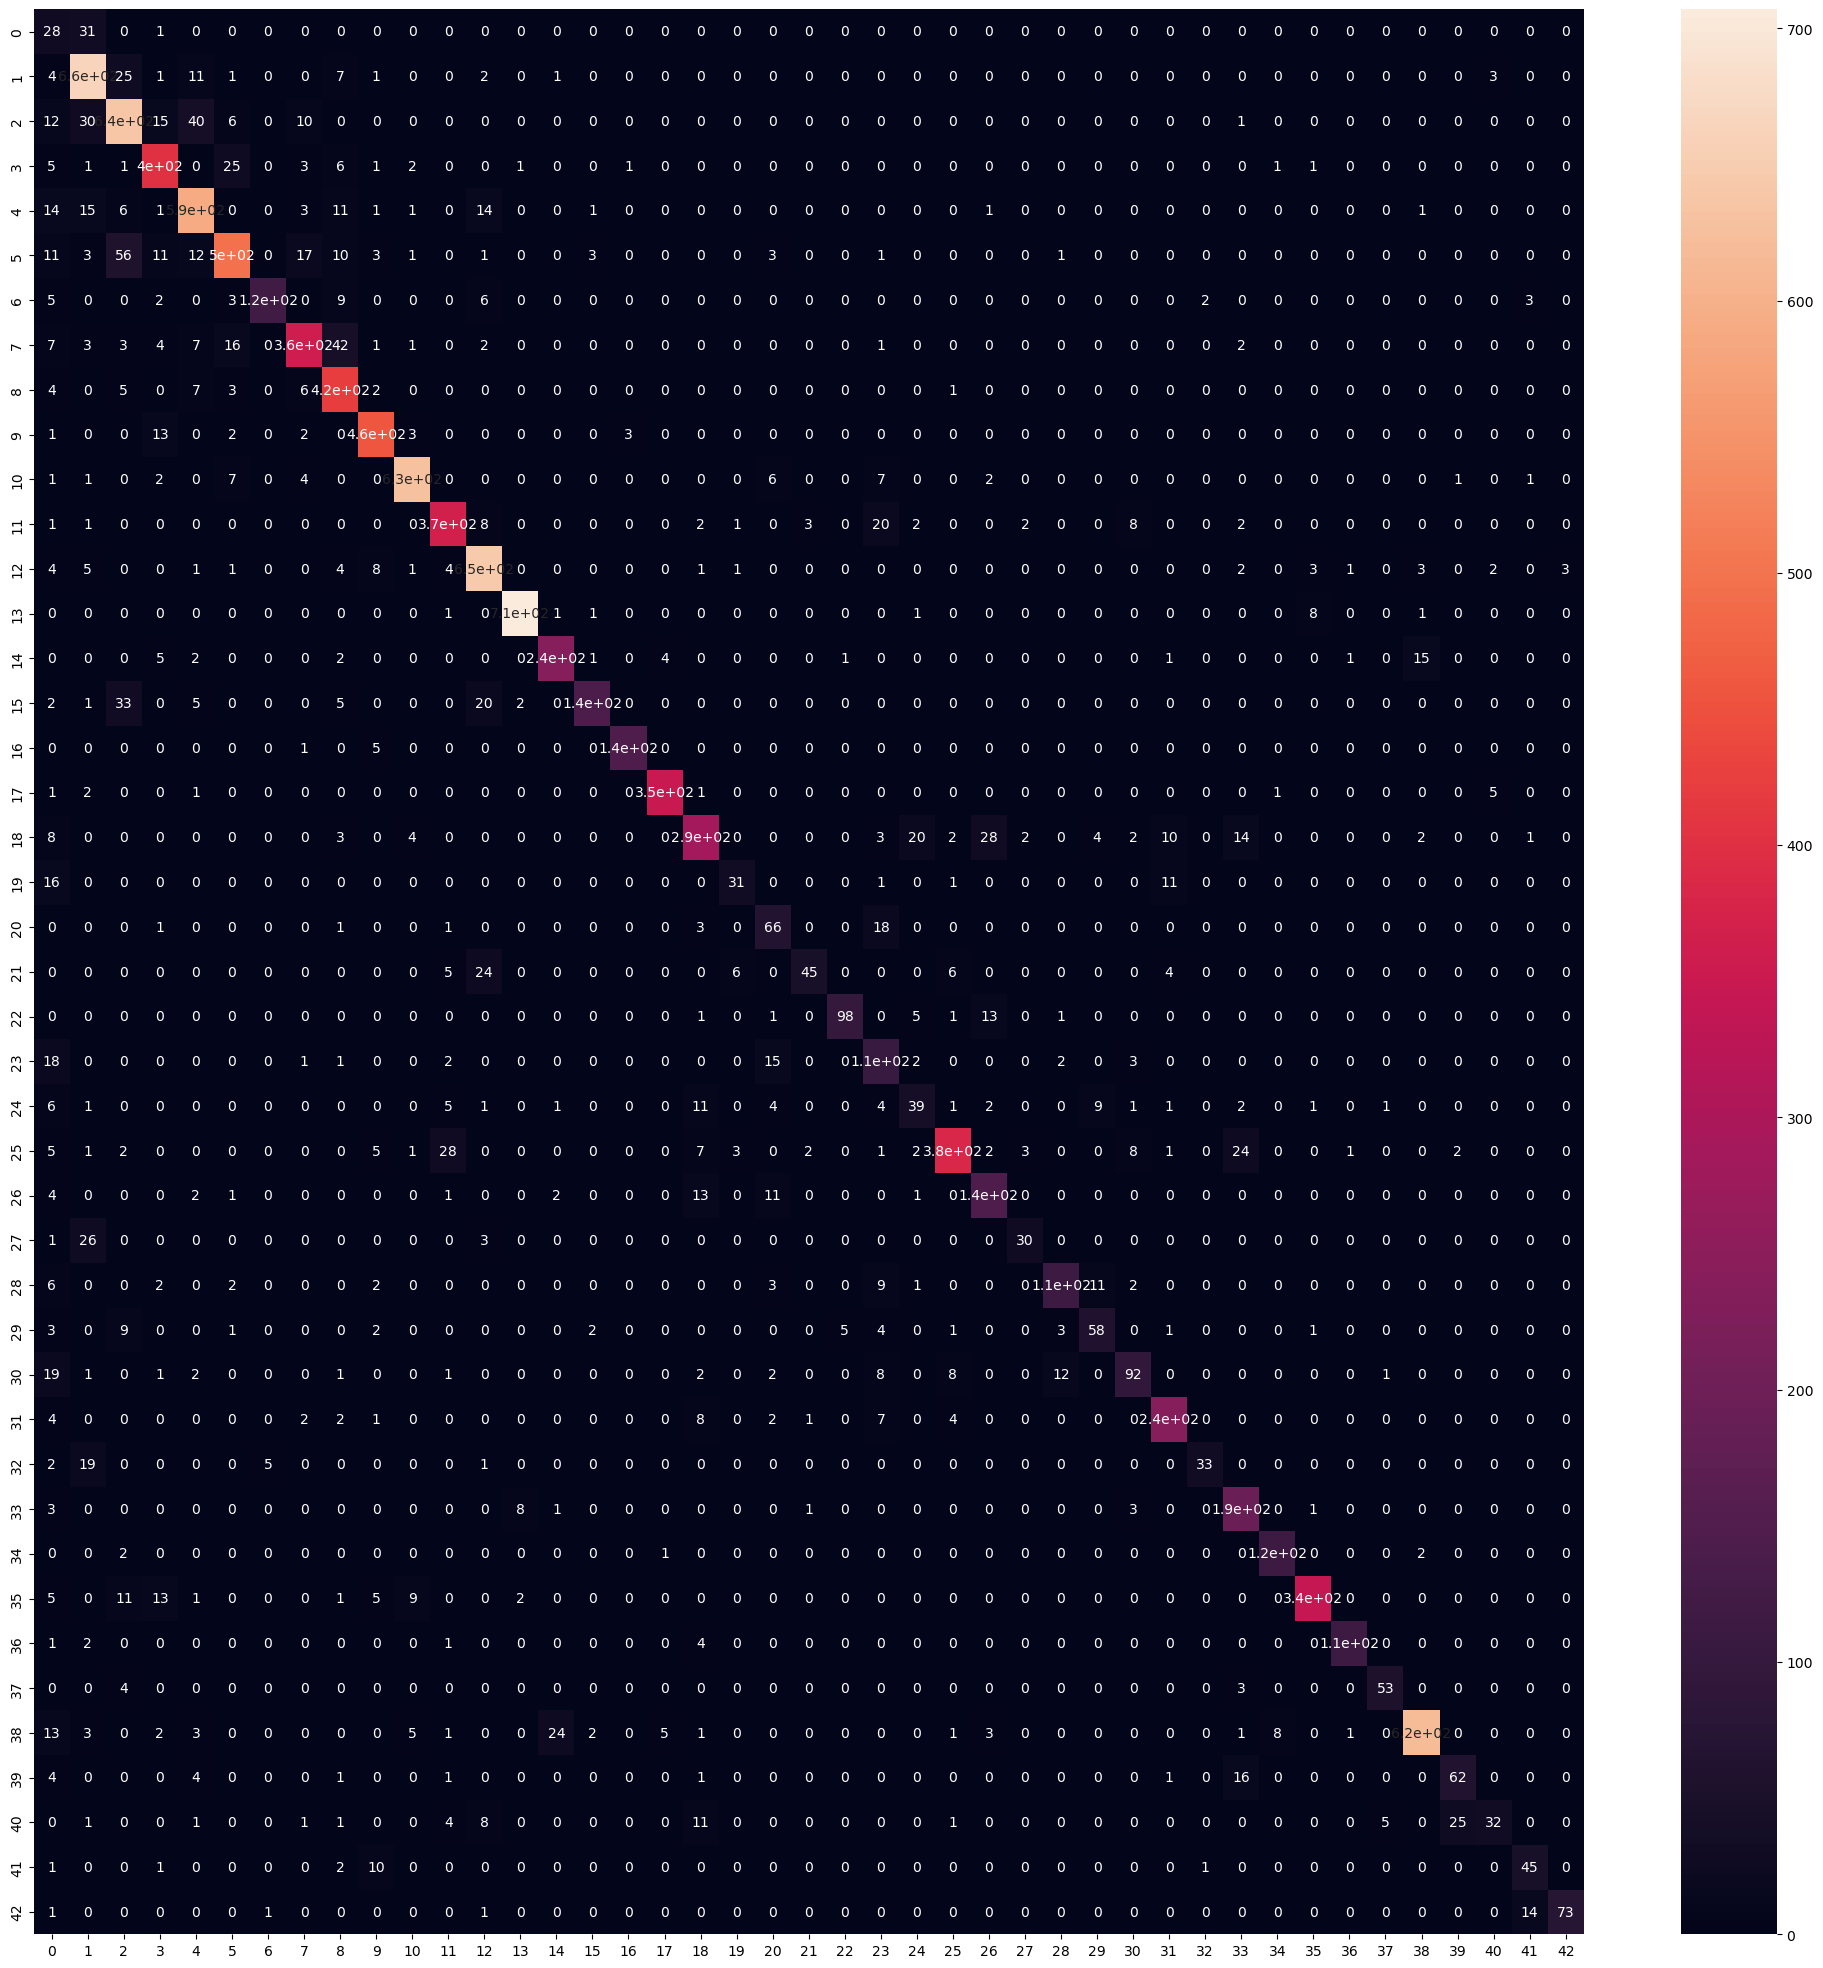

In [121]:

y_pred_multiclass = np.argmax(predicted_classes, axis=1)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_multiclass)


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)